# **TSF GRIP Task 1 : Prediction using Supervised ML**

### Problem Statement : To Predict the percentage of marks of the students based on the number of hours they studied

### Author: Dheeren Chirmade

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# reading the data from the dataset
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# checking data types of each column
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
# checking if there is any null value in the dataset
data.isnull == True

False

False means there is no null value in the dataset, so now we can visualize the data

## **Visual Representation for Relationship Between No.of Hours Studied and Score Achieved**

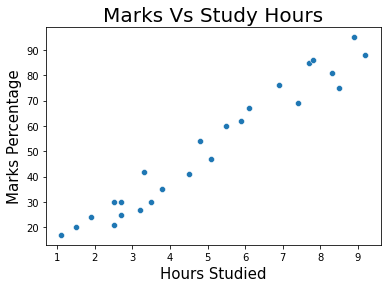

In [9]:
# creating the scatterplot for given data
sns.scatterplot(y= data['Scores'], x= data['Hours'])

# labelling the scatterplot 
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

This scatter plot shows positive correlation between Marks and Study Hours

### **Creating Linear Regression Model**

In [10]:
# importing libraries for regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [11]:
# defining features and target from data
features = data.Hours.values.reshape(len(data.Hours),1)
target = data.Scores.values.reshape(len(data.Scores),1)

In [12]:
# splitting dataset in training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, random_state = 0) 

In [13]:
# fitting data into the Linear Regression Model
regressor = LinearRegression().fit(Xtrain, ytrain)

### **Visual Representation of the Regression Model**

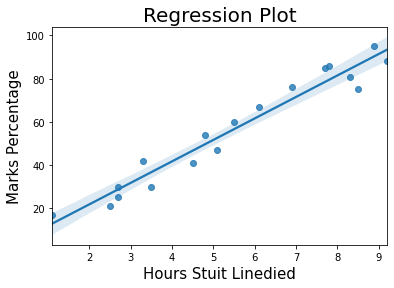

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [25]:
# creating the regression plot of the model
sns.regplot(x=Xtrain.reshape(-1), y=ytrain.reshape(-1))

# labelling the regression plot
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Stuit Linedied', size=15)
plt.show()

# printing the pairwise correlation of the all the columns
print(data.corr())

### **Testing the model**

In [15]:
val_predict = regressor.predict(Xtest)

**Visual Representation for Actual score vs Predicted score by Model¶**

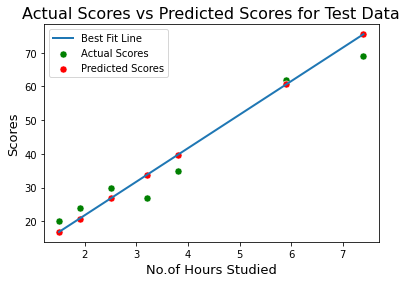

In [16]:
# best fit line representation
sns.lineplot(x = Xtest.reshape(-1), y = val_predict.reshape(-1), linewidth=2, label='Best Fit Line')

# actual score representation
predict_plot = sns.scatterplot(x = Xtest.reshape(-1), y = ytest.reshape(-1), color='green', label='Actual Scores', s=50)

# predicted score representation
sns.scatterplot(x=Xtest.reshape(-1), y= val_predict.reshape(-1), color='red', label='Predicted Scores', s=50)

# labelling the chart
predict_plot.set_title('Actual Scores vs Predicted Scores for Test Data', fontsize=16)
predict_plot.set_xlabel('No.of Hours Studied', fontsize=13)
predict_plot.set_ylabel('Scores', fontsize=13)
plt.show()

### **Evaluating the Model**

In [18]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_predict, ytest))

Mean absolute error:  4.130879918502482


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

### **What will be predicted score if a student studies for 9.25 hrs/ day?**

In [24]:
hour = [[9.25]]
score_predict = regressor.predict(hour)
print("Score : {}".format(int(round(score_predict[0][0]))) + " hours")

Score : 94 hours
